# Integration
## Gauss--Legendre quadrature
In lectures we plotted the errors in approximation of the rectangle, trapezium, and Simpson methods, as a function of the interval width, $h$.

On a log--log plot, the slope of the line gives the order of the leading error term.

In this notebook, you will implement Gauss--Legendre quadrature on one, two, and three nodes, and plot their errors on the same plot as those of the Newton--Cotes methods.

In [1]:
from functools import partial
from typing import Callable

import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt

Some Newton--Cotes methods.

In [2]:
def rectangle(f: Callable[[float], float], a: float | ndarray, b: float | ndarray) -> float | ndarray:
    """
    evaluate the rectangle rule approximation to the integral of f on the interval [a, b]

    >>> rectangle(f = lambda y: 4, a=1.0, b=3.0)  #doctest: +SKIP
    8.0
    """
    h = b - a
    return h * f(a)


def trapezium(f: Callable[[float], float], a: float | ndarray, b: float | ndarray) -> float | ndarray:
    """
    evaluate the trapezium rule approximation to the integral of f on the interval [a, b]

    >>> trapezium(f = lambda y: 4*y+4, a=1.0, b=3.0)  #doctest: +SKIP
    24.0
    """
    h = (b - a) / 2
    return h * (f(a) + f(b))


def simpson(f: Callable[[float], float], a: float | ndarray, b: float | ndarray) -> float | ndarray:
    """
    evaluate the Simpson rule approximation to the integral of f on the interval [a, b]

    >>> simpson(f=lambda y: 3*y**2+4*y+4, a=1.0, b=3.0)  #doctest: +SKIP
    50.0
    """
    h = (b - a) / 2
    return h / 3 * (f(a) + 4 * f((a + b) / 2) + f(b)) 


METHODS = {
    'rectangle': rectangle,
    'trapezium': trapezium,
    'simpson': simpson,
}


Some Gauss--Legendre quadrature functions. Work on them until the doctests pass.

In [26]:
def gauss1(f: Callable[[float], float], a: float | ndarray, b: float | ndarray) -> float | ndarray:
    """
    approximate the integral of f on the interval [a, b] using 1-node Gauss-Legendre quadrature

    >>> gauss1(f = lambda y: 4*y+4, a=1.0, b=3.0)
    24.0
    """
    return (b-a)*f((a+b)/2)


def gauss2(f: Callable[[float], float], a: float | ndarray, b: float | ndarray) -> float | ndarray:
    """
    approximate the integral of f on the interval [a, b] using 2-node Gauss-Legendre quadrature

    >>> gauss2(f=lambda y: 4*y**3+3*y**2+4*y+4, a=1.0, b=3.0)
    130.0
    """
    x1=-np.sqrt(1/3)
    x2=np.sqrt(1/3)
    w1=1
    w2=1
    x0=(a+b)/2
    h=(b-a)/2
    
    return h*(w1*f(x0+x1*h)+w2*f(x0+x2*h))

    
def gauss3(f: Callable[[float], float], a: float | ndarray, b: float | ndarray) -> float | ndarray:
    """
    approximate the integral of f on the interval [a, b] using 3-node Gauss-Legendre quadrature

    >>> gauss3(f=lambda y: 6*y**5-5*y**4+4*y**3-3*y**2+2*y-1, a=1.0, b=3.0) # doctest: +ELLIPSIS
    546.0
    """
    x1=-np.sqrt(3/5)
    x2=0
    x3=np.sqrt(3/5)
    w1=5/9
    w2=8/9
    w3=5/9
    x0=(a+b)/2
    h=(b-a)/2
    
    return h*(w1*f(x0+x1*h)+w2*f(x0+x2*h)+w3*f(x0+x3*h)) 


METHODS.update({
    "gauss1": gauss1,
    "gauss2": gauss2,
    "gauss3": gauss3,
})


if __name__ == "__main__":
    import doctest
    doctest.testmod(verbose=True)

Trying:
    gauss1(f = lambda y: 4*y+4, a=1.0, b=3.0)
Expecting:
    24.0
ok
Trying:
    gauss2(f=lambda y: 4*y**3+3*y**2+4*y+4, a=1.0, b=3.0)
Expecting:
    130.0
ok
Trying:
    gauss3(f=lambda y: 6*y**5-5*y**4+4*y**3-3*y**2+2*y-1, a=1.0, b=3.0) # doctest: +ELLIPSIS
Expecting:
    546.0
ok
5 items had no tests:
    __main__
    __main__.integrate
    __main__.rectangle
    __main__.simpson
    __main__.trapezium
3 items passed all tests:
   1 tests in __main__.gauss1
   1 tests in __main__.gauss2
   1 tests in __main__.gauss3
3 tests in 8 items.
3 passed and 0 failed.
Test passed.


The general-purpose integrate function from class.

In [27]:
def integrate(f: Callable[[float], float], a: float, b: float, intervals: int, method: str) -> float:
    """
    compute the integral of f on the major interval [a,b] by numerically integrating over a number of minor intervals
    using the specified method.

    Methods available are:
        Newton--Cotes:
            rectangle: rectangle rule
            trapezium: trapezium rule
            simpson: Simpson's rule
        Gauss--Legendre:
            gauss1: Gauss--Legendre quadrature on one node
            gauss2: Gauss--Legendre quadrature on two nodes
            gauss3: Gauss--Legendre quadrature on three nodes

    >>> integrate(f = lambda y: 4, a=1.0, b=3.0, intervals=10, method='rectangle')  #doctest: +SKIP
    8.0
    >>> integrate(f = lambda y: 4*y+4, a=1.0, b=3.0, intervals=10, method='trapezium')  #doctest: +SKIP
    24.0
    >>> integrate(f=lambda y: 3*y**2+4*y+4, a=1.0, b=3.0, intervals=10, method='simpson')  #doctest: +SKIP
    50.0
    """
    xs = np.linspace(a, b, intervals + 1)
    avals, bvals = xs[:-1], xs[1:]

    return METHODS[method](f, avals, bvals).sum()

if __name__ == "__main__":
    import doctest
    doctest.testmod(verbose=True)

Trying:
    gauss1(f = lambda y: 4*y+4, a=1.0, b=3.0)
Expecting:
    24.0
ok
Trying:
    gauss2(f=lambda y: 4*y**3+3*y**2+4*y+4, a=1.0, b=3.0)
Expecting:
    130.0
ok
Trying:
    gauss3(f=lambda y: 6*y**5-5*y**4+4*y**3-3*y**2+2*y-1, a=1.0, b=3.0) # doctest: +ELLIPSIS
Expecting:
    546.0
ok
5 items had no tests:
    __main__
    __main__.integrate
    __main__.rectangle
    __main__.simpson
    __main__.trapezium
3 items passed all tests:
   1 tests in __main__.gauss1
   1 tests in __main__.gauss2
   1 tests in __main__.gauss3
3 tests in 8 items.
3 passed and 0 failed.
Test passed.


Set up the function (cosine), its integral (sine), the limits of integration (a, b), the exact integral, the numbers of intervals, and the interval widths (h) for set of intervals.

In [30]:
f = np.cos
big_f = np.sin
a, b = 0, np.pi / 3
exact = big_f(b) - big_f(a)

intervals = np.logspace(0, 6, 7).astype(int)
hs = (b - a) / intervals

Presently, the code below only plots errors for the Newton--Cotes methods.

You have to implement the Gauss--Legendre methods and plot them on the **same** plot.

Save and upload your plot.

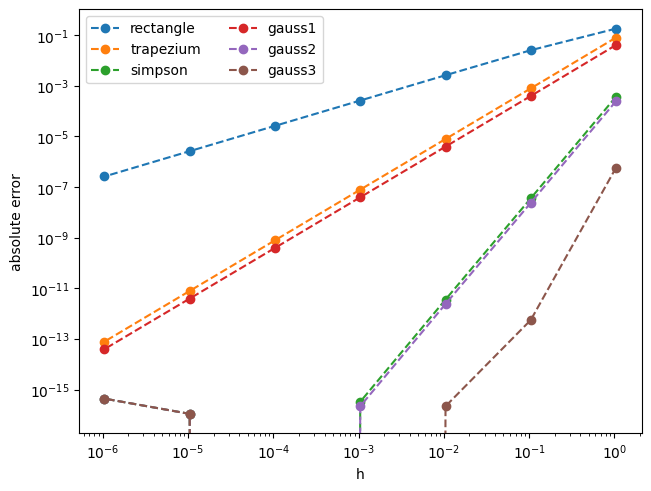

In [31]:
fig, ax = plt.subplots(1, 1, constrained_layout=True)

methods = (
    "rectangle",
    "trapezium",
    "simpson",
    "gauss1",
    "gauss2",
    "gauss3",
)

for method in methods:
    integrals = np.array([
        integrate(f, a, b, intervals=n, method=method)
        for n in intervals
    ])
    errors = abs(exact - integrals)
    ax.plot(hs, errors, 'o--', label=f'{method}')

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("h")
ax.set_ylabel("absolute error")
ax.legend(ncols=2)

In [25]:
print(METHODS)

{'rectangle': <function rectangle at 0x1157ad1c0>, 'trapezium': <function trapezium at 0x1157ad260>, 'simpson': <function simpson at 0x1157ad4e0>, 'gauss1': <function gauss1 at 0x1161aa660>, 'gauss2': <function gauss2 at 0x1161a82c0>, 'gauss3': <function gauss3 at 0x124409c60>}
